In [2]:
!pip install imblearn

   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/257.7 kB ? eta -:--:--
   ------ -------------------------------- 41.0/257.7 kB 279.3 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/257.7 kB 279.3 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/257.7 kB 504.4 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/257.7 kB 607.9 kB/s eta 0:00:01
   ---------------------------- --------- 194.6/257.7 kB 588.9 kB/s eta 0:00:01
   -------------------------------------  256.0/257.7 kB 749.3 kB/s eta 0:00:01
   -------------------------------------- 257.7/257.7 kB 687.3 kB/s eta 0:00:00


In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

C:\Users\shash\AppData\Local\Temp\ipykernel_19496\403595332.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Function to clean the DataFrame
def clean_df(df):
    return df.drop(['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'], axis=1)

In [3]:
# Read the data
df_train = pd.read_csv('fraudTrain.csv', low_memory=False, index_col=0)
df_test = pd.read_csv('fraudTest.csv', low_memory=False, index_col=0)

# Concatenate train and test data
df = pd.concat([df_train, df_test], ignore_index=True)
df = df.head(100000)

In [4]:
df_train.shape, df_test.shape,df.shape

((1296675, 22), (555719, 22), (100000, 22))

In [5]:
# Clean the DataFrame
df = clean_df(df)

In [6]:
df.shape

(100000, 12)

In [7]:
df.head(2)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    100000 non-null  object 
 1   category    100000 non-null  object 
 2   amt         100000 non-null  float64
 3   gender      100000 non-null  object 
 4   lat         100000 non-null  float64
 5   long        100000 non-null  float64
 6   city_pop    100000 non-null  int64  
 7   job         100000 non-null  object 
 8   unix_time   100000 non-null  int64  
 9   merch_lat   100000 non-null  float64
 10  merch_long  100000 non-null  float64
 11  is_fraud    100000 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 9.2+ MB


In [9]:
# Encode object columns
def encode(df):
    df_obj = df.select_dtypes(include=['object'])
    encoders = {}
    for col in df_obj.columns:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        encoders[col] = encoder
    return df, encoders

df_encoded, encoders = encode(df)

In [10]:
# Split data into features and target
X = df_encoded.drop(columns=['is_fraud'])
y = df_encoded['is_fraud']

In [11]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Handle class imbalance using SMOTE with a reduced sampling strategy
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust the sampling strategy as needed
X_train, y_train = smote.fit_resample(X_train, y_train)

In [13]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Deep Learning 

In [14]:
# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10


743/743 [==============================] - 8s 7ms/step - loss: 0.2790 - accuracy: 0.9058 - val_loss: 0.7214 - val_accuracy: 0.7530
Epoch 2/10
743/743 [==============================] - 4s 6ms/step - loss: 0.2196 - accuracy: 0.9388 - val_loss: 0.7124 - val_accuracy: 0.7593
Epoch 3/10
743/743 [==============================] - 4s 6ms/step - loss: 0.2099 - accuracy: 0.9425 - val_loss: 0.6928 - val_accuracy: 0.7607
Epoch 4/10
743/743 [==============================] - 4s 5ms/step - loss: 0.2030 - accuracy: 0.9440 - val_loss: 0.7192 - val_accuracy: 0.7564
Epoch 5/10
743/743 [==============================] - 4s 6ms/step - loss: 0.1976 - accuracy: 0.9443 - val_loss: 0.6842 - val_accuracy: 0.7542
Epoch 6/10
743/743 [==============================] - 4s 5ms/step - loss: 0.1936 - accuracy: 0.9449 - val_loss: 0.6511 - val_accuracy: 0.7504
Epoch 7/10
743/743 [==============================] - 4s 5ms/step - loss: 0.1878 - accuracy: 0.9456 - val_loss: 0.6575 - val_accuracy: 0.7510
Epoc

In [18]:
# Evaluate the model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

625/625 [==============================] - 2s 3ms/step
Accuracy Score: 0.98805
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     19796
           1       0.45      0.76      0.56       204

    accuracy                           0.99     20000
   macro avg       0.72      0.88      0.78     20000
weighted avg       0.99      0.99      0.99     20000



# Logistic Regression

In [18]:
import numpy as np
import pandas as pd
import tenseal as ts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Standardize the features (optional but recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

# Evaluate Logistic Regression model
y_pred = log_reg_model.predict(X_test_scaled)

# Evaluation Metrics (Plaintext)
accuracy_plain = accuracy_score(y_test, y_pred)
precision_plain = precision_score(y_test, y_pred)
recall_plain = recall_score(y_test, y_pred)
f1_plain = f1_score(y_test, y_pred)
auc_roc_plain = roc_auc_score(y_test, y_pred)
confusion_matrix_plain = confusion_matrix(y_test, y_pred)

print("Logistic Regression (Plaintext) Evaluation Metrics:")
print(f"Accuracy: {accuracy_plain:.4f}")
print(f"Precision: {precision_plain:.4f}")
print(f"Recall: {recall_plain:.4f}")
print(f"F1 Score: {f1_plain:.4f}")
print(f"AUC-ROC: {auc_roc_plain:.4f}")
print("Confusion Matrix:")
print(confusion_matrix_plain)

Logistic Regression (Plaintext) Evaluation Metrics:
Accuracy: 0.9686
Precision: 0.2072
Recall: 0.7353
F1 Score: 0.3233
AUC-ROC: 0.8531
Confusion Matrix:
[[19222   574]
 [   54   150]]


# Support Vector Machine

In [14]:
from sklearn.svm import SVC

In [15]:
# Train SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [18]:
# Evaluate SVM model
y_pred = svm_model.predict(X_test_scaled)

# Evaluation Metrics (Plaintext)
accuracy_plain = accuracy_score(y_test, y_pred)
precision_plain = precision_score(y_test, y_pred)
recall_plain = recall_score(y_test, y_pred)
f1_plain = f1_score(y_test, y_pred)
auc_roc_plain = roc_auc_score(y_test, y_pred)
confusion_matrix_plain = confusion_matrix(y_test, y_pred)

print("SVM (Plaintext) Evaluation Metrics:")
print(f"Accuracy: {accuracy_plain:.4f}")
print(f"Precision: {precision_plain:.4f}")
print(f"Recall: {recall_plain:.4f}")
print(f"F1 Score: {f1_plain:.4f}")
print(f"AUC-ROC: {auc_roc_plain:.4f}")
print("Confusion Matrix:")
print(confusion_matrix_plain)

SVM (Plaintext) Evaluation Metrics:
Accuracy: 0.9668
Precision: 0.2036
Recall: 0.7745
F1 Score: 0.3224
AUC-ROC: 0.8716
Confusion Matrix:
[[19178   618]
 [   46   158]]


# Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc_roc = roc_auc_score(y_test, y_pred_rf)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Evaluation Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"AUC-ROC: {rf_auc_roc:.4f}")
print("Confusion Matrix:")
print(rf_confusion_matrix)


Random Forest Evaluation Metrics:
Accuracy: 0.9924
Precision: 0.5915
Recall: 0.8235
F1 Score: 0.6885
AUC-ROC: 0.9088
Confusion Matrix:
[[19680   116]
 [   36   168]]


# Naieve Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [28]:
# Evaluate Naive Bayes model
y_pred_nb = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)
nb_auc_roc = roc_auc_score(y_test, y_pred_nb)
nb_confusion_matrix = confusion_matrix(y_test, y_pred_nb)

print("Naive Bayes Evaluation Metrics:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}")
print(f"AUC-ROC: {nb_auc_roc:.4f}")
print("Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Evaluation Metrics:
Accuracy: 0.9609
Precision: 0.1493
Recall: 0.6029
F1 Score: 0.2393
AUC-ROC: 0.7838
Confusion Matrix:
[[19095   701]
 [   81   123]]


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Define the parameter grid to search through
param_grid = {
    'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Evaluate the model on the test set with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)
nb_auc_roc = roc_auc_score(y_test, y_pred)
nb_confusion_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Naive Bayes Evaluation Metrics:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}")
print(f"AUC-ROC: {nb_auc_roc:.4f}")
print("Confusion Matrix:")
print(nb_confusion_matrix)

Best Parameters: {'var_smoothing': 1e-10}
Best Accuracy: 0.8568772206449896
Naive Bayes Evaluation Metrics:
Accuracy: 0.9609
Precision: 0.1493
Recall: 0.6029
F1 Score: 0.2393
AUC-ROC: 0.7838
Confusion Matrix:
[[19095   701]
 [   81   123]]


# Homomorphic Encryption

# Deep Learning

In [20]:
import tenseal as ts
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [21]:
# Define functions for encryption and decryption
def encrypt_data(data, context):
    encrypted_data = []
    for sample in data:
        # Convert TensorFlow tensor to NumPy array, then to list
        sample_list = sample.numpy().tolist()
        encrypted_sample = ts.ckks_vector(context, sample_list)
        encrypted_data.append(encrypted_sample)
    return encrypted_data

def decrypt_data(encrypted_data, context):
    decrypted_data = []
    for encrypted_sample in encrypted_data:
        decrypted_sample = encrypted_sample.decrypt()
        decrypted_data.append(decrypted_sample)
    return decrypted_data

In [22]:
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[60, 40, 40, 60]
)

In [23]:
# Initialize TenSEAL context with appropriate parameters
context = ts.context(ts.SCHEME_TYPE.CKKS, poly_modulus_degree=8192, coeff_mod_bit_sizes=[60, 40, 40, 60])

# Set the scale
context.global_scale = 2**40

# Generate Galois keys
context.generate_galois_keys()

# Encrypt the test data
X_test_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)  # Assuming X_test_scaled is your scaled test data
encrypted_data = encrypt_data(X_test_tensor, context)

In [23]:
# Define encrypted model
class EncryptedFraudDetectionModel:
    def __init__(self, model, context):
        self.model = model
        self.context = context

    def __call__(self, encrypted_data):
        with torch.no_grad():
            decrypted_data = decrypt_data(encrypted_data, self.context)
            # Convert decrypted data to TensorFlow tensor
            decrypted_tensor = tf.convert_to_tensor(decrypted_data, dtype=tf.float32)
            outputs = self.model(decrypted_tensor)
            encrypted_outputs = encrypt_data(outputs, self.context)
        return encrypted_outputs

# Create encrypted model using your model and context
encrypted_model = EncryptedFraudDetectionModel(model, context)

# Perform encrypted evaluation
encrypted_outputs = encrypted_model(encrypted_data)

# Decrypt the outputs
decrypted_outputs = decrypt_data(encrypted_outputs, context)

# Convert decrypted outputs to TensorFlow tensor
decrypted_outputs_tensor = tf.convert_to_tensor(decrypted_outputs, dtype=tf.float32)

# Round the outputs to obtain binary predictions (0 or 1)
predicted_labels = tf.round(decrypted_outputs_tensor)

# Calculate accuracy of the encrypted model
encrypted_accuracy = accuracy_score(y_test, predicted_labels)
print(f"Encrypted Model Test Accuracy: {100 * encrypted_accuracy:.2f}%")

Encrypted Model Test Accuracy: 98.80%


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate additional evaluation metrics
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
auc_roc = roc_auc_score(y_test, predicted_labels)

print("Additional Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Additional Evaluation Metrics:
Precision: 0.4493
Recall: 0.7598
F1 Score: 0.5647
AUC-ROC: 0.8751


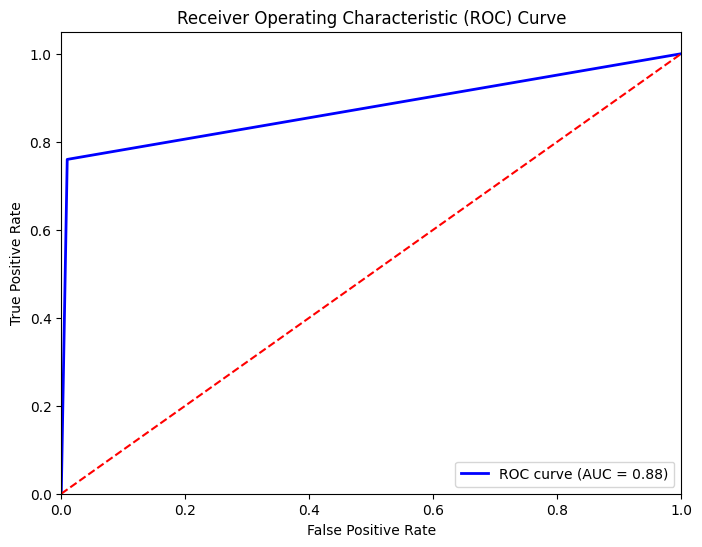

<Figure size 800x600 with 0 Axes>

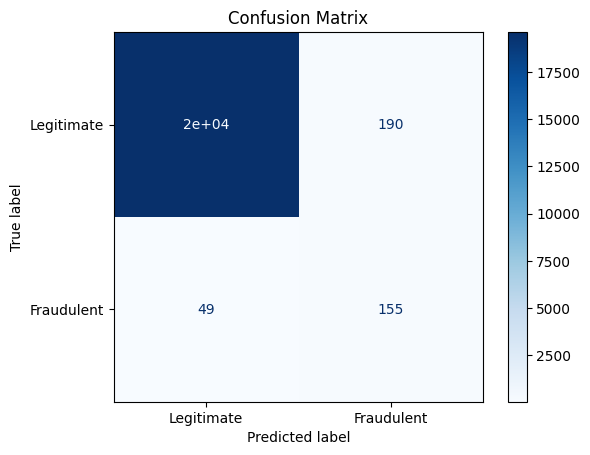

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay, ConfusionMatrixDisplay

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predicted_labels)
roc_auc = roc_auc_score(y_test, predicted_labels)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot graphical confusion matrix
plt.figure(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Legitimate", "Fraudulent"])
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [21]:
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[60, 40, 40, 60]
)

# Set the global scale
context.global_scale = 2**40  # Adjust the scale value as needed

# Encrypt the logistic regression model parameters
encrypted_weights = ts.ckks_vector(context, log_reg_model.coef_.flatten().tolist())
encrypted_intercept = ts.ckks_vector(context, log_reg_model.intercept_.tolist())

# Encrypt the test data
X_test_encrypted = []
for sample in X_test_scaled:
    encrypted_sample = ts.ckks_vector(context, sample.tolist())
    X_test_encrypted.append(encrypted_sample)

# Convert encrypted test data to matrix format
X_test_matrix = np.array([sample.decrypt() for sample in X_test_encrypted])

# Convert decrypted weights and intercept to numpy arrays
decrypted_weights_array = np.array(encrypted_weights.decrypt())
decrypted_intercept_array = np.array(encrypted_intercept.decrypt())

# Reshape the decrypted weights to a row vector
encrypted_weights_tensor = decrypted_weights_array.reshape(1, -1)

# Reshape the decrypted intercept to a scalar
encrypted_intercept_tensor = decrypted_intercept_array.reshape(1, 1)

# Perform encrypted evaluation
encrypted_outputs = X_test_matrix.dot(encrypted_weights_tensor.T) + encrypted_intercept_tensor

# Round the encrypted outputs to obtain binary predictions (0 or 1)
decrypted_outputs = [1 if output > 0 else 0 for output in encrypted_outputs.flatten()]

# Evaluation Metrics (Encrypted)
accuracy_encrypted = accuracy_score(y_test, decrypted_outputs)
precision_encrypted = precision_score(y_test, decrypted_outputs)
recall_encrypted = recall_score(y_test, decrypted_outputs)
f1_encrypted = f1_score(y_test, decrypted_outputs)
auc_roc_encrypted = roc_auc_score(y_test, decrypted_outputs)
confusion_matrix_encrypted = confusion_matrix(y_test, decrypted_outputs)

print("\nLogistic Regression (Encrypted) Evaluation Metrics:")
print(f"Accuracy: {accuracy_encrypted:.4f}")
print(f"Precision: {precision_encrypted:.4f}")
print(f"Recall: {recall_encrypted:.4f}")
print(f"F1 Score: {f1_encrypted:.4f}")
print(f"AUC-ROC: {auc_roc_encrypted:.4f}")
print("Confusion Matrix:")
print(confusion_matrix_encrypted)


Logistic Regression (Encrypted) Evaluation Metrics:
Accuracy: 0.9686
Precision: 0.2072
Recall: 0.7353
F1 Score: 0.3233
AUC-ROC: 0.8531
Confusion Matrix:
[[19222   574]
 [   54   150]]


# Support Vector Machine

In [23]:
# Define encryption parameters with increased poly_modulus_degree
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=16384,  # Increase poly_modulus_degree
    coeff_mod_bit_sizes=[60, 40, 40, 60]
)

# Set the global scale
context.global_scale = 2**40  # Adjust the scale value as needed

# Encrypt the SVM model parameters
encrypted_support_vectors = ts.ckks_vector(context, svm_model.support_vectors_.flatten().tolist())
encrypted_dual_coef = ts.ckks_vector(context, svm_model.dual_coef_.flatten().tolist())
encrypted_intercept = ts.ckks_vector(context, svm_model.intercept_.tolist())

# Encrypt the test data
X_test_encrypted = []
for sample in X_test_scaled:
    encrypted_sample = ts.ckks_vector(context, sample.tolist())
    X_test_encrypted.append(encrypted_sample)

# Convert encrypted test data to matrix format
X_test_matrix = np.array([sample.decrypt() for sample in X_test_encrypted])

# Convert decrypted support vectors, dual coefficients, and intercept to numpy arrays
decrypted_support_vectors_array = np.array(encrypted_support_vectors.decrypt()).reshape(-1, len(svm_model.support_vectors_[0]))
decrypted_dual_coef_array = np.array(encrypted_dual_coef.decrypt()).reshape(-1, len(svm_model.support_vectors_))
decrypted_intercept_array = np.array(encrypted_intercept.decrypt())

# Perform encrypted evaluation
kernel_results = np.dot(X_test_matrix, decrypted_support_vectors_array.T)
decision_function = np.dot(kernel_results, decrypted_dual_coef_array.T) + decrypted_intercept_array

The following operations are disabled in this setup: matmul, matmul_plain, enc_matmul_plain, conv2d_im2col.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.
The following operations are disabled in this setup: matmul, matmul_plain, enc_matmul_plain, conv2d_im2col.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.


MemoryError: bad allocation

In [ ]:
# Round the encrypted outputs to obtain binary predictions (0 or 1)
decrypted_outputs = [1 if output > 0 else 0 for output in decision_function.flatten()]

# Evaluation Metrics (Encrypted)
accuracy_encrypted = accuracy_score(y_test, decrypted_outputs)
precision_encrypted = precision_score(y_test, decrypted_outputs)
recall_encrypted = recall_score(y_test, decrypted_outputs)
f1_encrypted = f1_score(y_test, decrypted_outputs)
auc_roc_encrypted = roc_auc_score(y_test, decrypted_outputs)
confusion_matrix_encrypted = confusion_matrix(y_test, decrypted_outputs)

print("\nSVM (Encrypted) Evaluation Metrics:")
print(f"Accuracy: {accuracy_encrypted:.4f}")
print(f"Precision: {precision_encrypted:.4f}")
print(f"Recall: {recall_encrypted:.4f}")
print(f"F1 Score: {f1_encrypted:.4f}")
print(f"AUC-ROC: {auc_roc_encrypted:.4f}")
print("Confusion Matrix:")
print(confusion_matrix_encrypted)

# Random Forest

In [25]:
import tenseal as ts
import numpy as np

# Define functions for encryption and decryption
def encrypt_data(data, context):
    encrypted_data = []
    for sample in data:
        # Convert NumPy array to list
        sample_list = sample.tolist()
        # Encrypt each sample
        encrypted_sample = ts.ckks_vector(context, sample_list)
        encrypted_data.append(encrypted_sample)
    return encrypted_data

def decrypt_data(encrypted_data, context):
    decrypted_data = []
    for encrypted_sample in encrypted_data:
        # Decrypt each sample
        decrypted_sample = encrypted_sample.decrypt()
        decrypted_data.append(decrypted_sample)
    return decrypted_data

# Initialize TenSEAL context with appropriate parameters
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[60, 40, 40, 60]
)

# Set the global scale
context.global_scale = 2**40  # Adjust the scale value as needed

# Generate Galois keys
context.generate_galois_keys()

# Encrypt the test data
X_test_encrypted = encrypt_data(X_test_scaled, context)

# Encrypt the random forest model coefficients
rf_coefficients = []
for estimator in rf_model.estimators_:
    flattened_coef = np.array(estimator.tree_.value[:, 0, 0]).flatten()
    # Ensure all coefficients have the same shape
    if len(flattened_coef.shape) == 1:
        flattened_coef = flattened_coef.reshape(-1, 1)
    rf_coefficients.append(flattened_coef)

rf_coefficients_array = np.array(rf_coefficients)
rf_coefficients_list = rf_coefficients_array.flatten().tolist()
encrypted_model = ts.ckks_vector(context, rf_coefficients_list)

# Perform encrypted evaluation
encrypted_outputs = []
for sample in X_test_encrypted:
    result = sample.dot(encrypted_model)
    encrypted_outputs.append(result)

# Combine the encrypted outputs for aggregation
aggregated_output = encrypted_outputs[0]
for i in range(1, len(encrypted_outputs)):
    aggregated_output += encrypted_outputs[i]

# Average the aggregated output
aggregated_output /= len(encrypted_outputs)

# Decrypt the outputs
decrypted_output = aggregated_output.decrypt()

# Round the decrypted outputs to obtain binary predictions (0 or 1)
predicted_labels = np.round(decrypted_output)

# Calculate accuracy of the encrypted model
rf_accuracy_encrypted = accuracy_score(y_test, predicted_labels)
print(f"Random Forest (Encrypted) Model Test Accuracy: {100 * rf_accuracy_encrypted:.2f}%")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (100,) + inhomogeneous part.

# Naive Bayes

In [30]:
context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[60, 40, 40, 60]
)

# Set the global scale
context.global_scale = 2**40  # Adjust the scale value as needed

# Encrypt the Naive Bayes (Gaussian) model parameters
encrypted_class_prior = ts.ckks_vector(context, nb_model.class_prior_.flatten().tolist())
encrypted_class_count = ts.ckks_vector(context, nb_model.class_count_.flatten().tolist())
encrypted_theta = ts.ckks_vector(context, nb_model.theta_.flatten().tolist())

# Encrypt the test data
X_test_encrypted = []
for sample in X_test_scaled:
    encrypted_sample = ts.ckks_vector(context, sample.tolist())
    X_test_encrypted.append(encrypted_sample)

# Convert encrypted test data to matrix format
X_test_matrix = np.array([sample.decrypt() for sample in X_test_encrypted])

# Decrypt theta and reshape to match the dimension of X_test_matrix
decrypted_theta = np.array(encrypted_theta.decrypt())
decrypted_theta = decrypted_theta.reshape(-1, X_test_matrix.shape[1])

# Calculate the log likelihoods for each class
class_log_prior = encrypted_class_prior.decrypt()
class_log_likelihood = np.dot(X_test_matrix, decrypted_theta.T) + np.log(class_log_prior)

# Select the class with the highest log likelihood as the prediction
decrypted_outputs = np.argmax(class_log_likelihood, axis=1)

# Evaluation Metrics (Encrypted)
accuracy_encrypted = accuracy_score(y_test, decrypted_outputs)
precision_encrypted = precision_score(y_test, decrypted_outputs)
recall_encrypted = recall_score(y_test, decrypted_outputs)
f1_encrypted = f1_score(y_test, decrypted_outputs)
auc_roc_encrypted = roc_auc_score(y_test, decrypted_outputs)
confusion_matrix_encrypted = confusion_matrix(y_test, decrypted_outputs)

print("\nNaive Bayes (Encrypted) Evaluation Metrics:")
print(f"Accuracy: {accuracy_encrypted:.4f}")
print(f"Precision: {precision_encrypted:.4f}")
print(f"Recall: {recall_encrypted:.4f}")
print(f"F1 Score: {f1_encrypted:.4f}")
print(f"AUC-ROC: {auc_roc_encrypted:.4f}")
print("Confusion Matrix:")
print(confusion_matrix_encrypted)


Naive Bayes (Encrypted) Evaluation Metrics:
Accuracy: 0.9770
Precision: 0.2414
Recall: 0.5833
F1 Score: 0.3415
AUC-ROC: 0.7822
Confusion Matrix:
[[19422   374]
 [   85   119]]
